In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import cv2
import rasterio

In [3]:
train_imgs = glob('./sm_dataset/train_img/*.tif')
test_imgs = glob('./sm_dataset/test_img/*.tif')
train_masks = glob('./sm_dataset/train_mask/*.tif')

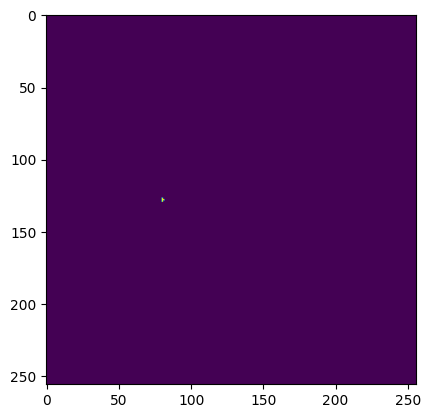

In [28]:
mask = rasterio.open(train_masks[11]).read().transpose(1,2,0)
plt.imshow(mask)

In [30]:
data = rasterio.open(train_imgs[19])
data.profile

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 256, 'height': 256, 'count': 10, 'crs': CRS.from_epsg(32636), 'transform': Affine(30.0, 0.0, 652425.0,
       0.0, -30.0, -2722665.0), 'blockysize': 1, 'tiled': False, 'interleave': 'pixel'}

In [31]:
data.bounds

BoundingBox(left=652425.0, bottom=-2730345.0, right=660105.0, top=-2722665.0)

In [32]:
data.lnglat()

(34.54403113683828, -24.644880978663583)

In [33]:
data.res

(30.0, 30.0)

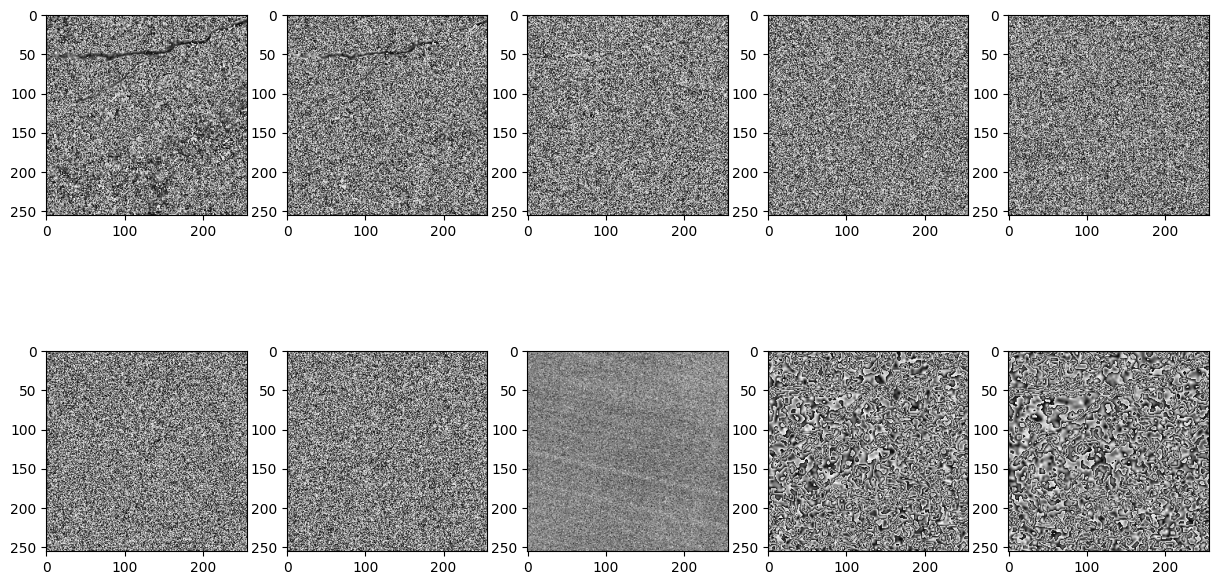

In [29]:
img = rasterio.open(train_imgs[19]).read().transpose(1,2,0)
img_8 = img.astype(np.uint8)

fig,axs = plt.subplots(2,5)
fig.set_figheight(8)
fig.set_figwidth(15)
for i in range(2):
    for j in range(5):
        axs[i,j].imshow(img_8[:,:,i*5+j],cmap = 'gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


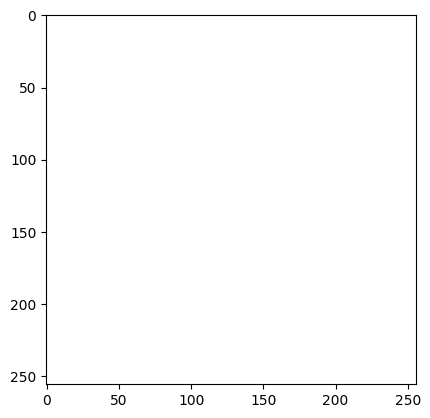

In [35]:
plt.imshow(rasterio.open(train_imgs[19]).read([1,2,3]).transpose(1, 2, 0))